# Statistics for Data Science with Python

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## load dataset 

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Statistical summary

In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 1. Provide a boxplot for the "Median value of owner-occupied homes"

In [5]:
print("mean value of data : ", round(boston_df["MEDV"].mean(), 2))
print("max value of data : ", round(boston_df["MEDV"].max(), 2))
print("min value of data : ", round(boston_df["MEDV"].min(), 2))
print("median value of data : ", round(boston_df["MEDV"].median(), 2))

mean value of data :  22.53
max value of data :  50.0
min value of data :  5.0
median value of data :  21.2


Text(0.5, 0, 'Value')

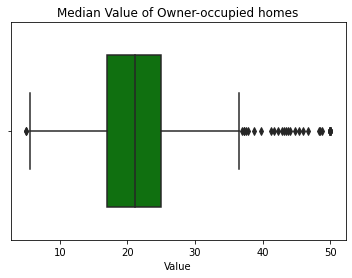

In [6]:
ax = sns.boxplot(x="MEDV", data=boston_df, width=0.7, color="green", showcaps =True)
ax.set_title("Median Value of Owner-occupied homes")
ax.set_xlabel("Value")

More than 1 outliers in the data.

### 2. Provide a Barplot for the Charles River variable.

In [7]:
boston_df[["CHAS"]].head()

,CHAS
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Text(0, 0.5, 'COUNT')

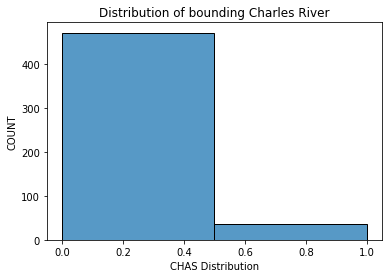

In [8]:
ax=sns.histplot(x="CHAS", data=boston_df, bins=2)
ax.set_title("Distribution of bounding Charles River")
ax.set_xlabel("CHAS Distribution")
ax.set_ylabel("COUNT")


Few houses that are bounded by Charles River

### 3. Provide a boxplot for the MEDV variable vs the AGE variable

In [9]:
boston_df.loc[boston_df["AGE"]<=35., "AGE_GROUP"] = "35 Years and Younger"
boston_df.loc[(boston_df["AGE"]>35)&(boston_df["AGE"]<70), "AGE_GROUP"] = "Between 35 and 70 years"
boston_df.loc[boston_df["AGE"]>=70, "AGE_GROUP"] = "70 Years and Older"

Text(0, 0.5, 'MEDV')

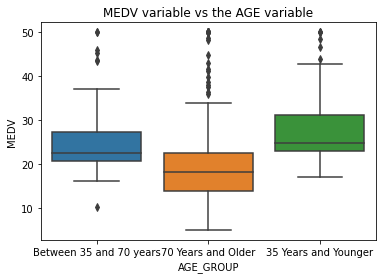

In [10]:
ax = sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df) 
ax.set_title("MEDV variable vs the AGE variable")
ax.set_xlabel("AGE_GROUP")
ax.set_ylabel("MEDV")

The oldest people tend to buy the cheaper houses.

### 4. Provide a scatter plot to show NOX vs INDUUS

Text(0, 0.5, 'INDUS')

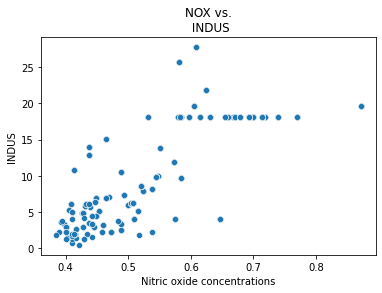

In [11]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax.set_title("NOX vs.\n INDUS")
ax.set_xlabel("Nitric oxide concentrations")
ax.set_ylabel("INDUS")

we notice that the proportion of Proportion Of INDUS is linearly related to the rate of NOX.

### 5) Create a histogram for the pupil to teacher ratio variable.

Text(0, 0.5, 'Count')

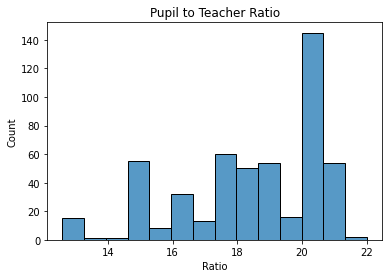

In [12]:
ax=sns.histplot(x="PTRATIO", data=boston_df)
ax.set_title("Pupil to Teacher Ratio")
ax.set_xlabel("Ratio")
ax.set_ylabel("Count")

#### Discussion
1- Ration increases within the range (15 to 19) and makes a higher score in 20, finally it decreases from  the ration of 21

# Task 5. Answer the provided questions

 Question 1: Is there a significant difference in the median value of houses bounded by the Charles River or not?

State Hypothesis:<br>
Null-hypothesis $H_0$: There is no difference in the median value bounded by Charles River.<br>
Aletrnate hypothesis $H_1$: There is a difference.

In [13]:
scipy.stats.levene(boston_df[boston_df["CHAS"] == 1]["MEDV"],
                  boston_df[boston_df["CHAS"] == 0]["MEDV"], center = "mean")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05 so, we can't assume the equalty of variance

In [14]:
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 1]["MEDV"],
                     boston_df[boston_df["CHAS"] == 0]["MEDV"], equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

Since the p-value < 0.05, we reject the null-hypothesis as there is enough proof that there is a statistical difference in the median value of houses bounded by the Charles River

#

Question 2: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

State Hypothesis:<br>
Null-hypothesis $H_0$: There is no difference in the median value of each proportion of owner-occupied units built before 1940.<br>
Aletrnative hypothesis $H_1$: There is a difference.

In [15]:
p1 = boston_df[boston_df["AGE_GROUP"] == "35 Years and Younger"]["MEDV"]
p2 = boston_df[boston_df["AGE_GROUP"] == "Between 35 and 70 years"]["MEDV"]
p3 = boston_df[boston_df["AGE_GROUP"] == "70 Years and Older"]["MEDV"]

In [16]:
scipy.stats.levene(p1, p2, p3, center="mean")

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the ($p-value = 0.0629$) is greater than ($\alpha$ $= 0.05$) the variances are equal.

In [17]:
f_stat, p_value = scipy.stats.f_oneway(p1, p2, p3)
print((f_stat, p_value))

(36.40764999196599, 1.7105011022702984e-15)


Since the p-value=$1.7105e-15$ is less than $\alpha = 0.05$, we will reject the null hypothesis as there is a significant evidence that at least one of the means differ.

###

Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

State the hypothesis:<br>
* $𝐻_0$: There is no relationship between NOX and INDUS data.
* $𝐻_1$: There is relationship between NOX and INDUS data.

In [18]:
scipy.stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])

(0.7636514469209157, 7.913361061233745e-98)

Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

### - Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

State the hypothesis:<br>
* $𝐻_0$: There is no correlation between DIS and MEDV data.
* $𝐻_1$: There is correlation between DIS and MEDV data.

Text(0, 0.5, 'MEDV')

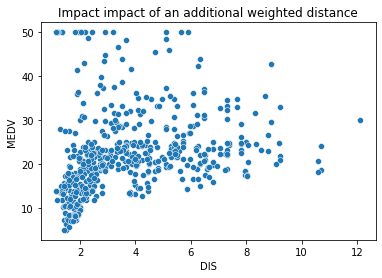

In [19]:
ax=sns.scatterplot(x = "DIS", y="MEDV", data=boston_df)
ax.set_title("Impact impact of an additional weighted distance")
ax.set_xlabel("DIS")
ax.set_ylabel("MEDV")

In [20]:
scipy.stats.pearsonr(boston_df["DIS"], boston_df["MEDV"])

(0.24992873408590388, 1.2066117273368017e-08)

#